### Importanto as bibliotecas

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

In [166]:
# Lista todos os arquivos CSV no diretório atual
arquivos_csv = glob.glob('Sample_combined_flights_*.csv')

# Cria uma lista vazia para armazenar os DataFrames
lista_dataframes = []

# Loop pelos arquivos CSV e os concatena em um único DataFrame
for arquivo in arquivos_csv:
    df = pd.read_csv(arquivo)
    lista_dataframes.append(df)

# Cria um único DataFrame a partir da lista de DataFrames
dados_anuais = pd.concat(lista_dataframes, ignore_index=True)


### Análise Inicial

In [121]:
dados_2018 = pd.read_csv('Sample_combined_flights_2018.csv')
dados_2019 = pd.read_csv('Sample_combined_flights_2019.csv')
dados_2020 = pd.read_csv('Sample_combined_flights_2020.csv')
dados_2021 = pd.read_csv('Sample_combined_flights_2021.csv')
dados_2022 = pd.read_csv('Sample_combined_flights_2022.csv')

#### Ano 2018

In [122]:
dados_2018.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2018-01-05,Endeavor Air Inc.,ATL,ABY,False,False,1037,1032.0,0.0,...,1052.0,1121.0,3.0,1137,-13.0,0.0,-1.0,1100-1159,1,0.0
1,1,2018-01-14,Endeavor Air Inc.,ATL,ABY,False,False,1037,1031.0,0.0,...,1047.0,1117.0,3.0,1137,-17.0,0.0,-2.0,1100-1159,1,0.0
2,2,2018-01-04,Endeavor Air Inc.,EWN,ATL,True,False,1415,NaN,NaN,...,NaN,NaN,NaN,1605,NaN,NaN,NaN,1600-1659,2,0.0
3,3,2018-01-09,Endeavor Air Inc.,FAY,ATL,False,False,1853,1850.0,0.0,...,1900.0,2004.0,17.0,2030,-9.0,0.0,-1.0,2000-2059,2,0.0
4,4,2018-01-15,Endeavor Air Inc.,CSG,ATL,False,False,615,625.0,10.0,...,634.0,656.0,8.0,711,-7.0,0.0,-1.0,0700-0759,1,0.0


In [123]:
# Verifica o tipo de cada coluna e se há valores nulos
dados_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56826 entries, 0 to 56825
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               56826 non-null  int64  
 1   FlightDate                               56826 non-null  object 
 2   Airline                                  56826 non-null  object 
 3   Origin                                   56826 non-null  object 
 4   Dest                                     56826 non-null  object 
 5   Cancelled                                56826 non-null  bool   
 6   Diverted                                 56826 non-null  bool   
 7   CRSDepTime                               56826 non-null  int64  
 8   DepTime                                  55982 non-null  float64
 9   DepDelayMinutes                          55965 non-null  float64
 10  DepDelay                                 55965

In [124]:
# Eliminando entradas com valores ausentes
dados_2018.dropna(inplace=True)

In [125]:
# Verificando novamente se as linhas foram eliminadas corretamente
dados_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55709 entries, 0 to 56825
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               55709 non-null  int64  
 1   FlightDate                               55709 non-null  object 
 2   Airline                                  55709 non-null  object 
 3   Origin                                   55709 non-null  object 
 4   Dest                                     55709 non-null  object 
 5   Cancelled                                55709 non-null  bool   
 6   Diverted                                 55709 non-null  bool   
 7   CRSDepTime                               55709 non-null  int64  
 8   DepTime                                  55709 non-null  float64
 9   DepDelayMinutes                          55709 non-null  float64
 10  DepDelay                                 55709 non-

In [126]:
dados_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,55709.0,2.841339e+04,16391.068187,0.0,14213.0,28378.0,42592.0,56825.0
CRSDepTime,55709.0,1.328759e+03,489.987016,1.0,915.0,1320.0,1735.0,2359.0
DepTime,55709.0,1.334276e+03,503.676200,1.0,918.0,1327.0,1744.0,2400.0
DepDelayMinutes,55709.0,1.346901e+01,43.783126,0.0,0.0,0.0,7.0,1264.0
DepDelay,55709.0,1.018433e+01,44.941119,-38.0,-6.0,-2.0,7.0,1264.0
ArrTime,55709.0,1.463969e+03,538.631251,1.0,1048.0,1506.0,1914.0,2400.0
ArrDelayMinutes,55709.0,1.381978e+01,43.853469,0.0,0.0,0.0,9.0,1243.0
AirTime,55709.0,1.105525e+02,71.188630,8.0,58.0,92.0,140.0,683.0
CRSElapsedTime,55709.0,1.395885e+02,73.361671,21.0,86.0,120.0,170.0,695.0
ActualElapsedTime,55709.0,1.350080e+02,73.133965,18.0,82.0,117.0,165.0,712.0


#### Ano 2019

In [127]:
dados_2019.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2019-04-02,Envoy Air,LIT,ORD,False,False,1212,1200.0,0.0,...,1210.0,1339.0,9.0,1405,-17.0,0.0,-2.0,1400-1459,3,0
1,1,2019-04-06,Envoy Air,ACT,DFW,False,False,525,512.0,0.0,...,522.0,546.0,12.0,615,-17.0,0.0,-2.0,0600-0659,1,0
2,2,2019-04-04,Envoy Air,CLT,TYS,False,False,1404,1400.0,0.0,...,1419.0,1454.0,3.0,1504,-7.0,0.0,-1.0,1500-1559,1,0
3,3,2019-04-08,Envoy Air,CLT,TYS,False,False,1404,1359.0,0.0,...,1420.0,1501.0,5.0,1504,2.0,0.0,0.0,1500-1559,1,0
4,4,2019-04-18,Envoy Air,ORD,MSP,False,False,1351,1350.0,0.0,...,1408.0,1504.0,3.0,1522,-15.0,0.0,-1.0,1500-1559,2,0


In [128]:
# Verifica o tipo de cada coluna e se há valores nulos
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80973 entries, 0 to 80972
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               80973 non-null  int64  
 1   FlightDate                               80973 non-null  object 
 2   Airline                                  80973 non-null  object 
 3   Origin                                   80973 non-null  object 
 4   Dest                                     80973 non-null  object 
 5   Cancelled                                80973 non-null  bool   
 6   Diverted                                 80973 non-null  bool   
 7   CRSDepTime                               80973 non-null  int64  
 8   DepTime                                  79454 non-null  float64
 9   DepDelayMinutes                          79452 non-null  float64
 10  DepDelay                                 79452

In [129]:
# Eliminando entradas com valores ausentes
dados_2019.dropna(inplace=True)

In [130]:
# Verificando novamente se as linhas foram eliminadas corretamente
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79187 entries, 0 to 80972
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               79187 non-null  int64  
 1   FlightDate                               79187 non-null  object 
 2   Airline                                  79187 non-null  object 
 3   Origin                                   79187 non-null  object 
 4   Dest                                     79187 non-null  object 
 5   Cancelled                                79187 non-null  bool   
 6   Diverted                                 79187 non-null  bool   
 7   CRSDepTime                               79187 non-null  int64  
 8   DepTime                                  79187 non-null  float64
 9   DepDelayMinutes                          79187 non-null  float64
 10  DepDelay                                 79187 non-

In [131]:
dados_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79187.0,4.052215e+04,23329.788790,0.0,20353.5,40516.0,60728.5,80972.0
CRSDepTime,79187.0,1.330452e+03,490.400468,4.0,915.0,1321.0,1735.0,2359.0
DepTime,79187.0,1.335828e+03,504.695019,1.0,917.0,1328.0,1745.0,2400.0
DepDelayMinutes,79187.0,1.426177e+01,49.539465,0.0,0.0,0.0,6.0,1639.0
DepDelay,79187.0,1.097136e+01,50.614044,-39.0,-6.0,-2.0,6.0,1639.0
ArrTime,79187.0,1.463910e+03,539.283559,1.0,1048.0,1504.0,1914.0,2400.0
ArrDelayMinutes,79187.0,1.448812e+01,49.481850,0.0,0.0,0.0,7.0,1615.0
AirTime,79187.0,1.082602e+02,69.417296,8.0,58.0,89.0,138.0,633.0
CRSElapsedTime,79187.0,1.387823e+02,71.316591,20.0,88.0,120.0,169.0,665.0
ActualElapsedTime,79187.0,1.335205e+02,71.307375,17.0,82.0,115.0,164.0,667.0


#### Ano 2020

In [132]:
dados_2020.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2020-09-18,Comair Inc.,CLT,BHM,False,False,2005,2001.0,0.0,...,2029.0,2029.0,3.0,2031,1.0,0.0,0.0,2000-2059,2,0.0
1,1,2020-09-16,Comair Inc.,CLT,FNT,False,False,2000,1953.0,0.0,...,2006.0,2125.0,7.0,2152,-20.0,0.0,-2.0,2100-2159,3,0.0
2,2,2020-09-23,Comair Inc.,CVG,CLT,False,False,827,820.0,0.0,...,832.0,935.0,23.0,1011,-13.0,0.0,-1.0,1000-1059,2,0.0
3,3,2020-09-24,Comair Inc.,CVG,CLT,False,False,827,826.0,0.0,...,900.0,1008.0,12.0,1011,9.0,0.0,0.0,1000-1059,2,0.0
4,4,2020-09-20,Comair Inc.,CLT,OKC,False,False,1336,1329.0,0.0,...,1344.0,1450.0,5.0,1513,-18.0,0.0,-2.0,1500-1559,4,0.0


In [133]:
# Verifica o tipo de cada coluna e se há valores nulos
dados_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50564 entries, 0 to 50563
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               50564 non-null  int64  
 1   FlightDate                               50564 non-null  object 
 2   Airline                                  50564 non-null  object 
 3   Origin                                   50564 non-null  object 
 4   Dest                                     50564 non-null  object 
 5   Cancelled                                50564 non-null  bool   
 6   Diverted                                 50564 non-null  bool   
 7   CRSDepTime                               50564 non-null  int64  
 8   DepTime                                  47488 non-null  float64
 9   DepDelayMinutes                          47488 non-null  float64
 10  DepDelay                                 47488

In [134]:
# Eliminando entradas com valores ausentes
dados_2020.dropna(inplace=True)

In [135]:
# Verificando novamente se as linhas foram eliminadas corretamente
dados_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47398 entries, 0 to 50563
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               47398 non-null  int64  
 1   FlightDate                               47398 non-null  object 
 2   Airline                                  47398 non-null  object 
 3   Origin                                   47398 non-null  object 
 4   Dest                                     47398 non-null  object 
 5   Cancelled                                47398 non-null  bool   
 6   Diverted                                 47398 non-null  bool   
 7   CRSDepTime                               47398 non-null  int64  
 8   DepTime                                  47398 non-null  float64
 9   DepDelayMinutes                          47398 non-null  float64
 10  DepDelay                                 47398 non-

In [136]:
dados_2020.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,47398.0,2.496512e+04,14236.435318,0.0,13097.25,25200.5,37199.75,50563.0
CRSDepTime,47398.0,1.317988e+03,461.016890,2.0,928.00,1314.5,1713.00,2359.0
DepTime,47398.0,1.315955e+03,467.429142,1.0,927.00,1315.0,1714.00,2400.0
DepDelayMinutes,47398.0,6.723849e+00,32.576204,0.0,0.00,0.0,0.00,1170.0
DepDelay,47398.0,2.050530e+00,33.778017,-54.0,-7.00,-4.0,-1.00,1170.0
ArrTime,47398.0,1.483742e+03,483.976776,1.0,1117.00,1513.0,1858.00,2400.0
ArrDelayMinutes,47398.0,6.917549e+00,32.020474,0.0,0.00,0.0,0.00,1157.0
AirTime,47398.0,1.061223e+02,65.662210,9.0,58.00,89.0,136.00,657.0
CRSElapsedTime,47398.0,1.351916e+02,67.148528,20.0,86.00,119.0,165.00,685.0
ActualElapsedTime,47398.0,1.283418e+02,66.843337,18.0,79.00,112.0,159.00,686.0


#### Ano 2021

In [137]:
dados_2021.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2021-03-03,SkyWest Airlines Inc.,LAX,PHX,False,False,1552,1601.0,9.0,...,1650.0,1850.0,17.0,1815,52.0,1.0,3.0,1800-1859,2,0.0
1,1,2021-03-02,SkyWest Airlines Inc.,SLC,ORD,False,False,1150,1141.0,0.0,...,1158.0,1530.0,14.0,1549,-5.0,0.0,-1.0,1500-1559,6,0.0
2,2,2021-03-02,SkyWest Airlines Inc.,LBB,DFW,False,False,1745,1736.0,0.0,...,1748.0,1834.0,11.0,1908,-23.0,0.0,-2.0,1900-1959,2,0.0
3,3,2021-03-02,SkyWest Airlines Inc.,PHX,FAT,False,False,933,927.0,0.0,...,1002.0,1023.0,5.0,1028,0.0,0.0,0.0,1000-1059,2,0.0
4,4,2021-03-08,SkyWest Airlines Inc.,ORD,MSP,False,False,1335,1329.0,0.0,...,1344.0,1446.0,4.0,1507,-17.0,0.0,-2.0,1500-1559,2,0.0


In [138]:
# Verifica o tipo de cada coluna e se há valores nulos
dados_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63325 entries, 0 to 63324
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               63325 non-null  int64  
 1   FlightDate                               63325 non-null  object 
 2   Airline                                  63325 non-null  object 
 3   Origin                                   63325 non-null  object 
 4   Dest                                     63325 non-null  object 
 5   Cancelled                                63325 non-null  bool   
 6   Diverted                                 63325 non-null  bool   
 7   CRSDepTime                               63325 non-null  int64  
 8   DepTime                                  62295 non-null  float64
 9   DepDelayMinutes                          62294 non-null  float64
 10  DepDelay                                 62294

In [139]:
# Eliminando entradas com valores ausentes
dados_2021.dropna(inplace=True)

In [140]:
# Verificando novamente se as linhas foram eliminadas corretamente
dados_2021.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62111 entries, 0 to 63324
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               62111 non-null  int64  
 1   FlightDate                               62111 non-null  object 
 2   Airline                                  62111 non-null  object 
 3   Origin                                   62111 non-null  object 
 4   Dest                                     62111 non-null  object 
 5   Cancelled                                62111 non-null  bool   
 6   Diverted                                 62111 non-null  bool   
 7   CRSDepTime                               62111 non-null  int64  
 8   DepTime                                  62111 non-null  float64
 9   DepDelayMinutes                          62111 non-null  float64
 10  DepDelay                                 62111 non-

In [141]:
dados_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,62111.0,3.158764e+04,18279.393643,0.0,15765.5,31477.0,47340.5,63324.0
CRSDepTime,62111.0,1.323285e+03,475.070173,18.0,919.0,1315.0,1723.0,2359.0
DepTime,62111.0,1.327156e+03,488.266576,1.0,921.0,1323.0,1731.0,2400.0
DepDelayMinutes,62111.0,1.283001e+01,48.267731,0.0,0.0,0.0,6.0,2338.0
DepDelay,62111.0,9.524963e+00,49.271958,-38.0,-6.0,-2.0,6.0,2338.0
ArrTime,62111.0,1.477198e+03,516.119220,1.0,1104.0,1512.0,1910.0,2400.0
ArrDelayMinutes,62111.0,1.264961e+01,47.815591,0.0,0.0,0.0,6.0,2322.0
AirTime,62111.0,1.104919e+02,68.711053,9.0,60.0,94.0,140.0,657.0
CRSElapsedTime,62111.0,1.404419e+02,70.234301,21.0,90.0,124.0,170.0,675.0
ActualElapsedTime,62111.0,1.343131e+02,70.087939,17.0,83.0,118.0,165.0,687.0


#### Ano 2022

In [142]:
dados_2022.head()

,Unnamed: 0,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,0,2022-04-04,Air Wisconsin Airlines Corp,ORD,DLH,False,False,857,848.0,0.0,...,911.0,1020.0,2.0,1035,-13.0,0.0,-1.0,1000-1059,2,0
1,1,2022-04-04,Air Wisconsin Airlines Corp,ORD,SDF,False,False,1450,1439.0,0.0,...,1453.0,1639.0,11.0,1718,-28.0,0.0,-2.0,1700-1759,2,0
2,2,2022-04-04,Air Wisconsin Airlines Corp,ORD,CHO,False,False,1400,1355.0,0.0,...,1416.0,1635.0,3.0,1656,-18.0,0.0,-2.0,1600-1659,3,0
3,3,2022-04-03,"GoJet Airlines, LLC d/b/a United Express",MDT,ORD,False,False,1741,1731.0,0.0,...,1742.0,1827.0,9.0,1849,-13.0,0.0,-1.0,1800-1859,3,0
4,4,2022-04-03,"Commutair Aka Champlain Enterprises, Inc.",IAH,JAN,False,False,2003,2154.0,111.0,...,2208.0,2308.0,7.0,2126,109.0,1.0,7.0,2100-2159,2,0


In [143]:
# Verifica o tipo de cada coluna e se há valores nulos
dados_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40423 entries, 0 to 40422
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               40423 non-null  int64  
 1   FlightDate                               40423 non-null  object 
 2   Airline                                  40423 non-null  object 
 3   Origin                                   40423 non-null  object 
 4   Dest                                     40423 non-null  object 
 5   Cancelled                                40423 non-null  bool   
 6   Diverted                                 40423 non-null  bool   
 7   CRSDepTime                               40423 non-null  int64  
 8   DepTime                                  39223 non-null  float64
 9   DepDelayMinutes                          39220 non-null  float64
 10  DepDelay                                 39220

In [144]:
# Eliminando entradas com valores ausentes
dados_2022.dropna(inplace=True)

In [145]:
# Verificando novamente se as linhas foram eliminadas corretamente
dados_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39117 entries, 0 to 40422
Data columns (total 62 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               39117 non-null  int64  
 1   FlightDate                               39117 non-null  object 
 2   Airline                                  39117 non-null  object 
 3   Origin                                   39117 non-null  object 
 4   Dest                                     39117 non-null  object 
 5   Cancelled                                39117 non-null  bool   
 6   Diverted                                 39117 non-null  bool   
 7   CRSDepTime                               39117 non-null  int64  
 8   DepTime                                  39117 non-null  float64
 9   DepDelayMinutes                          39117 non-null  float64
 10  DepDelay                                 39117 non-

In [146]:
dados_2022.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,39117.0,2.016701e+04,11665.156323,0.0,10117.0,20122.0,30180.0,40422.0
CRSDepTime,39117.0,1.329088e+03,490.720682,1.0,912.0,1320.0,1731.0,2359.0
DepTime,39117.0,1.334262e+03,507.175068,1.0,916.0,1326.0,1743.0,2400.0
DepDelayMinutes,39117.0,1.573983e+01,49.892028,0.0,0.0,0.0,11.0,1423.0
DepDelay,39117.0,1.283682e+01,50.920915,-38.0,-5.0,-1.0,11.0,1423.0
ArrTime,39117.0,1.457288e+03,544.271236,1.0,1043.0,1500.0,1914.0,2400.0
ArrDelayMinutes,39117.0,1.566391e+01,49.773283,0.0,0.0,0.0,10.0,1419.0
AirTime,39117.0,1.111206e+02,70.170967,14.0,60.0,93.0,141.0,659.0
CRSElapsedTime,39117.0,1.414651e+02,72.268792,25.0,89.0,124.0,172.0,685.0
ActualElapsedTime,39117.0,1.360414e+02,72.015619,20.0,84.0,119.0,167.0,685.0


### 1) Análise de Companhias Aéreas


#### 1 -  Quais são as principais companhias aéreas que mais voaram durante cada ano?

In [159]:
# Realizando a contagem de voos para cada companhia aérea
companhias_mais_voaram_2018 = dados_2018.groupby(['Year', 'Airline']).size().reset_index(name='NumberFlights').nlargest(10, 'NumberFlights')
companhias_mais_voaram_2018

,Year,Airline,NumberFlights
23,2018,Southwest Airlines Co.,13291
26,2018,United Air Lines Inc.,6194
22,2018,SkyWest Airlines Inc.,5270
9,2018,Delta Air Lines Inc.,4587
3,2018,American Airlines Inc.,3727
18,2018,JetBlue Airways,2971
21,2018,Republic Airlines,1982
1,2018,Alaska Airlines Inc.,1825
24,2018,Spirit Air Lines,1750
13,2018,ExpressJet Airlines Inc.,1593


In [160]:
# Realizando a contagem de voos para cada companhia aérea
companhias_mais_voaram_2019 = dados_2019.groupby(['Year', 'Airline']).size().reset_index(name='NumberFlights').nlargest(10, 'NumberFlights')
companhias_mais_voaram_2019

,Year,Airline,NumberFlights
22,2019,Southwest Airlines Co.,13261
8,2019,Delta Air Lines Inc.,9945
3,2019,American Airlines Inc.,9364
21,2019,SkyWest Airlines Inc.,8095
25,2019,United Air Lines Inc.,6226
20,2019,Republic Airlines,3216
11,2019,Envoy Air,3165
17,2019,JetBlue Airways,2948
5,2019,Comair Inc.,2724
1,2019,Alaska Airlines Inc.,2577


In [161]:
# Realizando a contagem de voos para cada companhia aérea
companhias_mais_voaram_2020 = dados_2020.groupby(['Year', 'Airline']).size().reset_index(name='NumberFlights').nlargest(10, 'NumberFlights')
companhias_mais_voaram_2020

,Year,Airline,NumberFlights
21,2020,Southwest Airlines Co.,8865
20,2020,SkyWest Airlines Inc.,5641
8,2020,Delta Air Lines Inc.,5543
3,2020,American Airlines Inc.,5349
24,2020,United Air Lines Inc.,2950
19,2020,Republic Airlines,2114
10,2020,Endeavor Air Inc.,2068
11,2020,Envoy Air,2001
5,2020,Comair Inc.,1806
17,2020,JetBlue Airways,1362


In [162]:
# Realizando a contagem de voos para cada companhia aérea
companhias_mais_voaram_2021 = dados_2021.groupby(['Year', 'Airline']).size().reset_index(name='NumberFlights').nlargest(10, 'NumberFlights')
companhias_mais_voaram_2021

,Year,Airline,NumberFlights
18,2021,Southwest Airlines Co.,10418
7,2021,Delta Air Lines Inc.,7437
17,2021,SkyWest Airlines Inc.,7384
3,2021,American Airlines Inc.,7206
20,2021,United Air Lines Inc.,4427
16,2021,Republic Airlines,3248
8,2021,Endeavor Air Inc.,2775
9,2021,Envoy Air,2409
5,2021,Comair Inc.,2208
14,2021,JetBlue Airways,1971


In [163]:
# Realizando a contagem de voos para cada companhia aérea
companhias_mais_voaram_2022 = dados_2022.groupby(['Year', 'Airline']).size().reset_index(name='NumberFlights').nlargest(10, 'NumberFlights')
companhias_mais_voaram_2022

,Year,Airline,NumberFlights
18,2022,Southwest Airlines Co.,7086
7,2022,Delta Air Lines Inc.,5096
3,2022,American Airlines Inc.,4745
17,2022,SkyWest Airlines Inc.,4219
20,2022,United Air Lines Inc.,3300
16,2022,Republic Airlines,1909
14,2022,JetBlue Airways,1430
9,2022,Envoy Air,1377
5,2022,Comair Inc.,1360
8,2022,Endeavor Air Inc.,1317


#### 2 - A pandemia afetou a operação de alguma delas? De que forma?

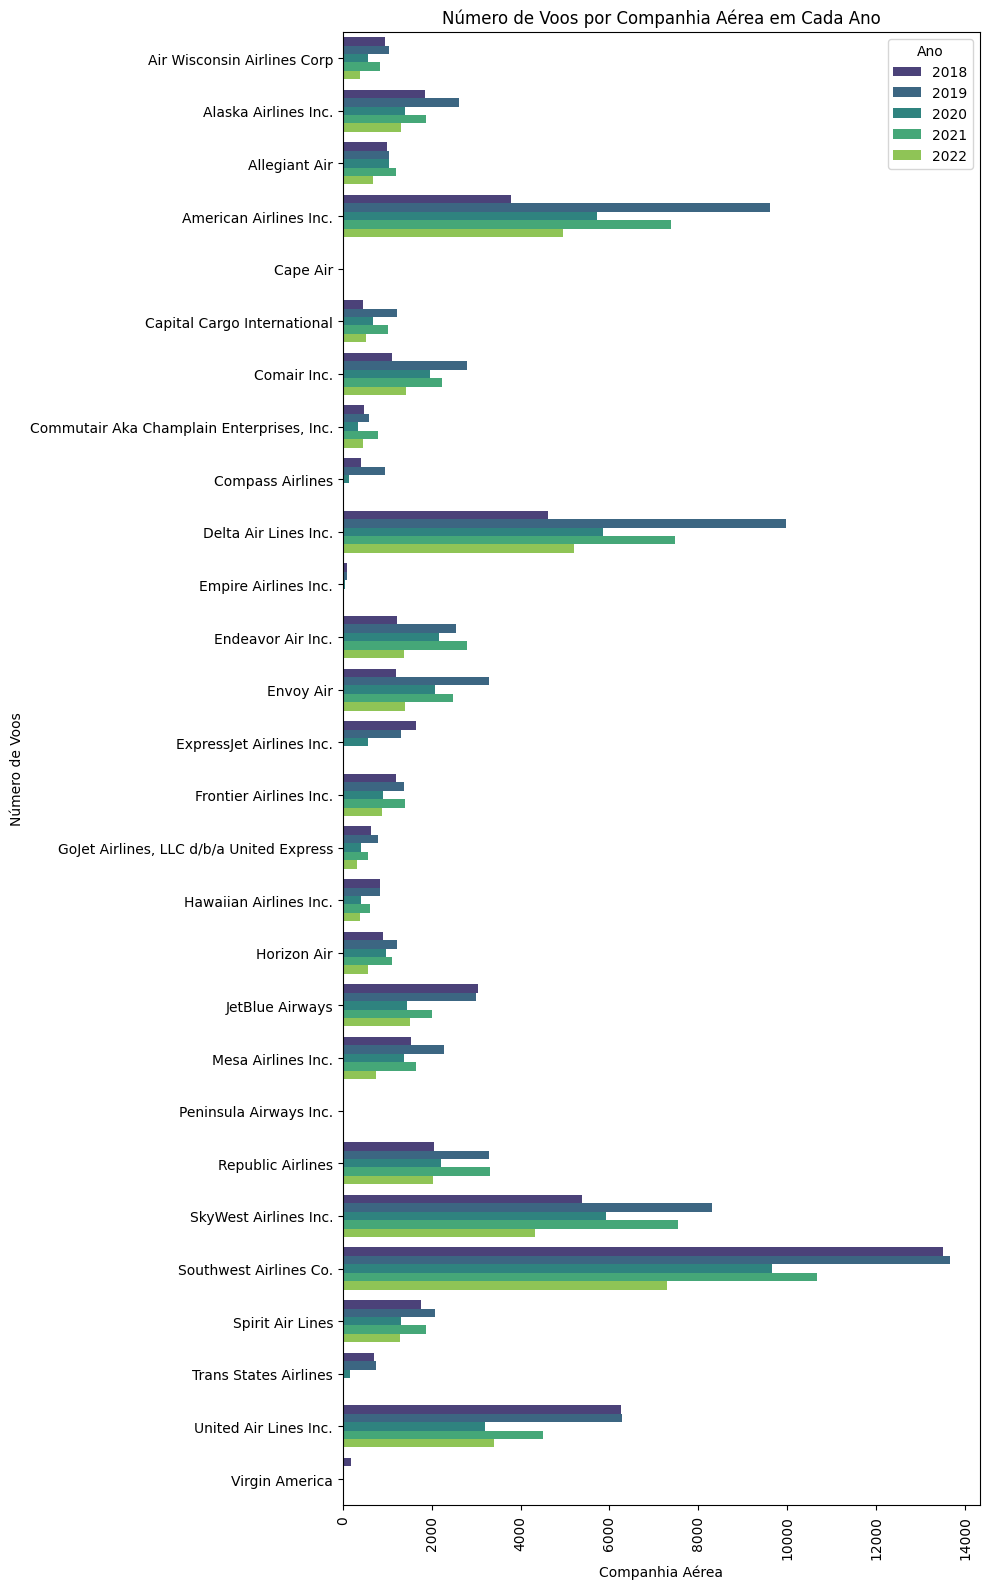

In [186]:

# Calculando o número de voos por companhia aérea em cada ano
voos_por_companhia_por_ano = dados_anuais.groupby(['Year', 'Airline']).size().reset_index(name='NumberFlights')

# Plotando o gráfico de barras usando Seaborn com 'hue' para diferenciar por ano
plt.figure(figsize=(10, 16))
sns.barplot(data=voos_por_companhia_por_ano, x='NumberFlights', y='Airline', hue='Year', palette='viridis')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Voos')
plt.title('Número de Voos por Companhia Aérea em Cada Ano')
plt.legend(title='Ano')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()
plt.show()

**Conclusão:**

Como pode ser observado no gráfico número de voos por companhia aérea em cada ano, todas as companhias sofreram redução na quantidade de voos realizados durante o período de pandemia (2019-2022) comparado ao período pré-pandemia.

#### 3 - Quais as companhias que alteraram mais voos durante a pandemia?